In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.utils import np_utils

In [2]:
from google.colab import drive 
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
my_imgs = np.load('/content/drive/MyDrive/Milestone 3/new-images2.npy',  allow_pickle = True)
letters = np.load('/content/drive/MyDrive/Milestone 3/new-labels2.npy',  allow_pickle = True)

In [4]:
labels = [ord(i)-97 for i in letters] #pre-processing
my_labels = np.array(labels)
print(len(my_labels))

3639


In [5]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [6]:
import cv2
import numpy as np
jill = np.empty((3639, 224, 224, 3))
for i in range(3639):
  jill[i] = expand_greyscale_image_channels(cv2.resize(my_imgs[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR))

In [7]:
jill.shape

(3639, 224, 224, 3)

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(26, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = "sparse_categorical_crossentropy",metrics = ['acc'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(jill, my_labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [12]:

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))

Epoch 1/20
69/69 [==============================] - 20s 222ms/step - loss: 6.2201 - acc: 0.3614 - val_loss: 2.0021 - val_acc: 0.6140
Epoch 2/20
69/69 [==============================] - 11s 162ms/step - loss: 1.7369 - acc: 0.6065 - val_loss: 1.8426 - val_acc: 0.6401
Epoch 3/20
69/69 [==============================] - 11s 163ms/step - loss: 0.9853 - acc: 0.7595 - val_loss: 1.9146 - val_acc: 0.6607
Epoch 4/20
69/69 [==============================] - 11s 162ms/step - loss: 0.7570 - acc: 0.8149 - val_loss: 1.9253 - val_acc: 0.6758
Epoch 5/20
69/69 [==============================] - 11s 161ms/step - loss: 0.5729 - acc: 0.8562 - val_loss: 1.9378 - val_acc: 0.6923
Epoch 6/20
69/69 [==============================] - 11s 160ms/step - loss: 0.4778 - acc: 0.8740 - val_loss: 2.0606 - val_acc: 0.6896
Epoch 7/20
69/69 [==============================] - 11s 160ms/step - loss: 0.3504 - acc: 0.9116 - val_loss: 2.1308 - val_acc: 0.6951
Epoch 8/20
69/69 [==============================] - 11s 160ms/step - 

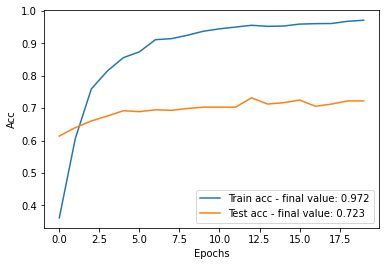

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']; val_acc = history.history['val_acc']
plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Acc"); plt.show()

In [17]:
model.evaluate(X_test, y_test, verbose = 2)

23/23 - 3s - loss: 3.2144 - acc: 0.6786 - 3s/epoch - 122ms/step


[3.21435809135437, 0.6785714030265808]